In [37]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"../Data/insurance.csv")
df.head()

age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
y = df.charges #outcome variable
X = df.iloc[:, :-1] #feature matrix
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((936, 8), (402, 8))

In [7]:
936/(X.shape[0])

0.6995515695067265

###### Linear regression model 

In [8]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

In [9]:
res = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
res["error"] = res.predicted - res.actual
res.head()

actual     predicted        error
559    1646.4297   4610.315541  2963.885841
1087  11353.2276  12887.893880  1534.666280
1020   8798.5930  12573.948752  3775.355752
460   10381.4787  13197.836626  2816.357926
802    2103.0800    629.337182 -1473.742818

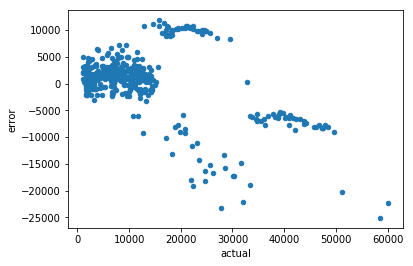

In [10]:
#Scatter plot actual vs error
res.plot.scatter("actual", "error")

In [13]:
sse = np.sum(res.error ** 2) # sum of squared error
sse

14778105453.509327

In [19]:
mse = np.mean(res.error ** 2) #mean squared error
mse

36761456.35201325

In [20]:
#root mean squared error
rmse = np.sqrt(mse)
rmse

6063.12265685045

In [21]:
rmse/np.std(y_test)

0.5093143119010882

In [22]:
sst = np.sum((np.mean(y_train) - y_test) ** 2)
sst

56970277938.44925

In [23]:
#coefficient of regression
r2 = 1 - sse/sst
r2

0.7405997304511027

In [24]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

### Making a Model to run on any dataset in General

In [25]:
target = "charges"
y = df[target] #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))


training r2: 0.7545557492633161 
testing r2: 0.740598931692721 
training mse: 36476790.76410686 
testing mse: 36761456.35201328


In [26]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
pd.DataFrame(scaler.transform(X_train)).describe()

0             1             2             3             4  \
count  9.360000e+02  9.360000e+02  9.360000e+02  9.360000e+02  9.360000e+02   
mean  -1.081756e-16 -4.516805e-16 -2.087599e-17  7.591269e-17  9.678867e-17   
std    1.000535e+00  1.000535e+00  1.000535e+00  1.000535e+00  1.000535e+00   
min   -1.485041e+00 -2.419524e+00 -9.040023e-01 -1.023787e+00 -5.096643e-01   
25%   -9.144925e-01 -7.247116e-01 -9.040023e-01 -1.023787e+00 -5.096643e-01   
50%   -5.867016e-02 -3.076297e-02 -8.567913e-02  9.767656e-01 -5.096643e-01   
75%    8.684707e-01  6.631857e-01  7.326440e-01  9.767656e-01 -5.096643e-01   
max    1.795612e+00  3.689196e+00  3.187613e+00  9.767656e-01  1.962076e+00   

                  5             6             7  
count  9.360000e+02  9.360000e+02  9.360000e+02  
mean  -1.897817e-17  6.832142e-17 -9.489086e-19  
std    1.000535e+00  1.000535e+00  1.000535e+00  
min   -5.592522e-01 -6.003875e-01 -5.872202e-01  
25%   -5.592522e-01 -6.003875e-01 -5.872202e-01  
50%   -5.592522e-01 -6.003875e-01 -5.872202e-01  
75%   -5.592522e-01  1.665591e+00  1.702939e+00  
max    1.788102e+00  1.665591e+00  1.702939e+00

In [28]:
est = pipe.steps[-1][-1]
est

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
est.intercept_, est.coef_

(13276.698553898505,
 array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
        9733.78688309, -129.54588605, -414.54148288, -379.09534369]))

In [30]:
pd.DataFrame({"feature": X.columns, "weight": est.coef_})

feature       weight
0               age  3528.982731
1               bmi  1961.655208
2          children   421.550164
3       gender_male  -141.359110
4        smoker_yes  9733.786883
5  region_northwest  -129.545886
6  region_southeast  -414.541483
7  region_southwest  -379.095344

#### Feature Engineering and Tweaking the input dataset

In [31]:
target = "charges"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X["high_bmi"] = np.where(X.bmi > 30, "Y", "N")
X["high_age"] = np.where(X.age > 60, "Y", "N")
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.8372593719000909 
testing r2: 0.872923592758387 
training mse: 0.13775274019670497 
testing mse: 0.1068949044005997


<b>training r2: 0.8372593719000909 <br>
testing r2: 0.872923592758387 <br>
training mse: 0.13775274019670497 <br>
testing mse: 0.1068949044005997 <br> </b>

###### see how the degree multiplies and work


In [32]:
a = (np.random.ranf((4, 3)) * 10).astype(np.int)
a

array([[4, 6, 9],
       [1, 8, 4],
       [3, 4, 7],
       [8, 8, 5]])

In [33]:
pd.DataFrame(preprocessing.PolynomialFeatures(degree=2, include_bias=False).fit_transform(a))

0    1    2     3     4     5     6     7     8
0  4.0  6.0  9.0  16.0  24.0  36.0  36.0  54.0  81.0
1  1.0  8.0  4.0   1.0   8.0   4.0  64.0  32.0  16.0
2  3.0  4.0  7.0   9.0  12.0  21.0  16.0  28.0  49.0
3  8.0  8.0  5.0  64.0  64.0  40.0  64.0  40.0  25.0

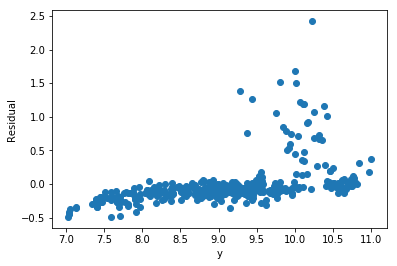

In [34]:
def plot_residuals(y, y_pred):
    plt.scatter(y, y-y_pred)
    plt.xlabel("y")
    plt.ylabel("Residual")
plot_residuals(y_test, y_test_pred)

In [35]:
import scipy as sp

In [36]:
sp.stats.probplot(y_test-y_test_pred, dist='norm', plot=plt);

### -----------------------------------------------------END----------------------------------------------------------